# Stochastic programming -- Approximation and Sampling Method

# 1. Introduction

How can we solve an optimization problem of the form
\begin{align}
\underset{x \in X}{\text{minimize}}& \; f(x) 
\end{align}

where $X \subset \mathbb{R}^{d}$ and the real-valued function $f(·)$ cannot be computed exactly, but can be
estimated through a simulation? One of approximation and sampling methods in stochastic programming is call Sample Average Approximation (SAA). The principle of SAA allows one to tackle such problems through the use of sampling and optimization methods for deterministic problems. 

# 2. Sampling Average Approximation (SAA) 

Let $\xi$ be a random vector with probability $\mathbb{P}$, $X \subset \mathbb{R}^{d}$ and let $\{\xi^{i}\}_{i=1}^{N}$  iid samples of $\xi$ and $\mathbb{P}_{N}(\xi=\xi^{i})=\frac{1}{N}$ .


## 2.1 Original problem:

\begin{align}
(P) \;
\underset{x \in X}{\text{minimize}}& \; f(x) = \mathbb{E}[F(x, \xi)]\nonumber
\end{align}

$F(x, \xi)$ is the solution to original optimization problem. If the parameters with stochastic component had a discrete distribution, $\mathbb{E}[F(x, \xi)]$ has a closed form. However, if $\mathbb{E}[F(x, \xi)]$ cannot be computed since the integral of the expectation becomes computationally intractable, therefore it must be approximated through monte carlo, that is, through sampling.


## 2.2. Approximate problem:

\begin{align}
(\hat{P}_{N}) \;
\underset{x \in X}{\text{minimize}}& \; \hat{f}_{N}(x) = \mathbb{E}_{P_{N}}[F(x, \xi)]=\frac{1}{N}\sum_{i=1}^{N}F(x, \xi^{i})\nonumber
\end{align}

Let $\delta$ be the optimal value of the original problem and  $S$  be the set of optimal solutions. On the other hand, $\hat{\delta}_{N}$  and $\hat{S}_{N}$ be the optimal value and the set of optimal solutions of the approximate problem, respectively.



## 2.3. Upper and lower bound

There are upper and lower bound for the objective value of the original problem:

\begin{equation*}
\forall N \in \mathbb{N}, \; \mathbb{E}[\hat{\delta}_{N}]\leq\delta\leq\mathbb{E}[F(x,\xi)], \; \forall x \in X
\end{equation*}

How do we estimate the bounds?

### 2.3.1 Lower bound

Fix $N$ and solve $n_{1}$ problems with $n_{1}<N$, then we obtain the optimal set of values $\{ \hat{\delta}_{N,i} \}_{i=1}^{n_{1}}$ and $\{ \hat{x}_{N,i} \}_{i=1}^{n_{1}}$ optimal solutions of the approximate problem. Let $\bar{\delta}_{N, n_{1}}=\frac{1}{n_{1}}\sum_{i=1}^{n_{1}}\hat{\delta}_{N,i}$ the average of the lower bound and  $s_{N, n_{1}}^{2}=\frac{1}{n_{1}(n_{1}-1)}\sum_{i=1}^{n_{1}}(\hat{\delta}_{N,i}-\bar{\delta}_{N, n_{1}})^{2}$ the standard deviation of the lower bound. By central limit theorem we have:


\begin{equation*}
\mathbb{P}(LB=\bar{\delta}_{N, n_{1}}-z_{\alpha}s_{N, n_{1}}\leq \delta)\geq 1-\alpha
\end{equation*}

Where $z_{\alpha}$ is the value associated with a standard normal distribution
with an accumulated probability$1-\alpha$, that is,  $\Phi^{-1}(1-\alpha)=z_{\alpha}$. Note that if $\alpha$ is small $z_{\alpha}$  grows and therefore the lower bound of the probability is greater.



### 2.3.2 Upper bound

Choose $n_{2}$, let $\hat{f}_{n_{2}}(x) = \frac{1}{n_{2}}\sum_{j=1}^{n_{2}}F(x, \xi^{j})$ and $s_{n_{2}}^{2}(x)=\frac{1}{n_{2}(n_{2}-1)}\sum_{j=1}^{n_{2}}(F(x, \xi^{j})-\hat{f}_{n_{2}})^{2}$ the average and standard deviation of the upper dimensions given a $x$. By central limit theorem we have:


    
\begin{equation*}
\mathbb{P}(\hat{f}_{n_{2}}(x)+z_{\alpha}s_{n_{2}}(x)\geq \delta)\geq 1- \alpha, \; \forall x \in X
\end{equation*}
    
Let $\mu_{i} = \hat{f}_{n_{2}}(\hat{x}_{N,i})+z_{\alpha}s_{n_{2}}(\hat{x}_{N,i})$ must be:  
    
\begin{align}
\mathbb{P}\big( \;
UB=\underset{i =1, \ldots n_{1}}{\text{min}}& \mu_{i} \geq \delta\big)\geq 1- \alpha \nonumber
\end{align}



# 2. Example stochastic linear programming problem


## 2.1 Problem

\begin{align}
\nonumber
F(y, \xi) = \underset{x}{\text{min}}\quad& \;   2x_{1}+3x_{2}x_{d}+ E[7y_{1}(\xi) + 12y_{2}(\xi)]\\ \nonumber
\textrm{s.t.}\quad & \;  x_{1} + x_{2} \leq 100\\ \nonumber
& \; (2+{\xi}_{1}) x_{1} + 6x_{2} + y_{1}({\xi})  \geq 180 + {\xi}_{2} \\ \nonumber
& \; 3x_{1} + (3.4 - {\xi}_{3}) x_{2}  + y_{2}({\xi})  \geq 162 + {\xi}_{4} \\ \nonumber
& \; x_{1}, x_{2} \geq 0  \\ \nonumber
& \; y_{1}({\xi}), y_{2}({\xi}) \geq 0 \\ \nonumber
\end{align}



where  ${\xi} = ( {\xi}_{1},\, {\xi}_{2},\, {\xi}_{3},\, {\xi}_{4}\,)$. Suppose ${\xi}_{1},\, {\xi}_{2},\, {\xi}_{3},\, {\xi}_{4}\,$ are independent random variables, and 
- ${\xi}_{1} \sim U(-0.8,0.8)$ 
- ${\xi}_{2} \sim N(0,12)$ 
- ${\xi}_{3} \sim exp(2.5)$ 
- ${\xi}_{4} \sim N(0,9)$ 

# 3. Code implementation

The code is written in gurobi for the optimization.

In [ ]:
import numpy as np
import gurobipy as grb
import scipy.stats as stat
from tqdm.notebook import trange
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
N_seq = [10, 20, 50, 100, 200, 500, 1000]; # number of samples
# N_seq = [10 50 100 200 500 1000]; # numb of samples
M = 10; # numb of replication
Nprim = 100000;
alpha = 0.05;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

UB_seq = np.zeros(len(N_seq));
UB_me_seq = np.zeros(len(N_seq));
UB_ci_up_seq = np.zeros(len(N_seq));
UB_ci_low_seq = np.zeros(len(N_seq));
UB_ci= np.zeros(len(N_seq));

x_id = [1,2]
y_id = [1,2]

In [5]:
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(-0.8,0.8,N) ;
        e2 = np.random.normal(0, 12, N);
        e3 = np.random.exponential(scale=2.5, size = N);
        e4 = np.random.normal(0, 9, N);
        
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB');
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        for k in x_id:
            x[k] = LB_model.addVar(lb=0,name="x(%s)" % (k))
        y = {}
        for k in y_id:
            for j in range(N):
                y[k,j] = LB_model.addVar(lb=0,name="y(%s_%s)" % (k,j))
        LB_model.update()

        # Define Objective
        LB_model.setObjective( ( 2*x[1]+3*x[2]+ grb.quicksum(7*y[1,k]+12*y[2,k]  for k in range(N) )*1.0/N ),grb.GRB.MINIMIZE)
        
        
        # Constraints
        LB_model.addConstr(x[1]+x[2] <= 100 , name="constr1")
        for k in range(N):
            LB_model.addConstr( y[1,k] >= 180 + e2[k] - 6*x[2] - (2 + e1[k]) * x[1], name="constr2(%s)"%(k) )
            LB_model.addConstr( y[2,k] >= 162 + e4[k] - 3*x[1] - (3.4 - e3[k]) * x[2], name="constr3(%s)"%(k) )

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;

        # Upper bound #######################################################################
        # Nprim independent parameter samples
        s1 = np.random.uniform(-0.8,0.8,Nprim) ;
        s2 = np.random.normal(0, 12, Nprim);
        s3 = np.random.exponential(scale=2.5, size = Nprim);
        s4 = np.random.normal(0, 9, Nprim);
        UB_exp = 0;       
        
        # model
        UB_model = grb.Model('SAA_UB');
        UB_model.setParam('OutputFlag', 0)
        
        # variables
        y = {}
        for k in y_id:
            for j in range(Nprim):
                y[k,j] = UB_model.addVar(lb=0,name="y(%s_%s)" % (k,j))
        UB_model.update()

        # Define Objective
        UB_model.setObjective( ( 2*xval[1]+3*xval[2]+ grb.quicksum(7*y[1,kk]+12*y[2,kk]  for kk in range(Nprim) )*1.0/Nprim ), grb.GRB.MINIMIZE)
        
        
        # Constraints
        for kk in range(Nprim):
            UB_model.addConstr( y[1,kk] >= 180 + s2[kk] - 6*xval[2] - (2 + s1[kk]) * xval[1], name="constr2(%s)"%(kk) )
            UB_model.addConstr( y[2,kk] >= 162 + s4[kk] - 3*xval[1] - (3.4 - s3[kk]) * xval[2], name="constr3(%s)"%(kk) )

        UB_model.optimize()
        UB_exp = UB_model.objVal;
        UB_obj[rep_m] = UB_exp;
        
    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");

    ######################## UB confidence interval calculation ########################
    UB_seq[s] = sum(UB_obj)*1.0/M;
    print("Upper Bound = ", UB_seq[s]);
    UB_var = sum([np.square(UB_obj[k]-UB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Upper Bound Variance = ", UB_var);
    # marginal error
    UB_me = (stat.norm.ppf(1-alpha)*np.power(UB_var,1/2))*1.0/(np.power(M,1)/2);
    UB_ci[s] = UB_me
    UB_ci_up_seq[s]  = UB_seq[s] + UB_me;
    UB_ci_low_seq[s] = UB_seq[s] - UB_me;
    print("CI of Upper Bound= [", UB_ci_low_seq[s]," , ", UB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################



Lower Bound =  177.92681157055395
Lower Bound Variance =  144.3910428061339
CI of Lower Bound = [ 173.97380643170504  ,  181.87981670940286 ]
Upper Bound =  265.1732312455225
Upper Bound Variance =  1962.8957569179672
CI of Upper Bound= [ 250.59832161808254  ,  279.7481408729625 ]
######################## Sample size ( 20 ) ########################



Lower Bound =  193.09947004084884
Lower Bound Variance =  167.32367499794015
CI of Lower Bound = [ 188.8441135405971  ,  197.35482654110058 ]
Upper Bound =  223.3230039874004
Upper Bound Variance =  121.63937165535748
CI of Upper Bound= [ 219.69477794294048  ,  226.95123003186032 ]
######################## Sample size ( 50 ) ########################



Lower Bound =  197.79838980457242
Lower Bound Variance =  137.13755557959388
CI of Lower Bound = [ 193.94595361011565  ,  201.6508259990292 ]
Upper Bound =  217.37405882345396
Upper Bound Variance =  47.712577111621016
CI of Upper Bound= [ 215.10171685374632  ,  219.6464007931616 ]
######################## Sample size ( 100 ) ########################



Lower Bound =  206.9907173296251
Lower Bound Variance =  36.30220429409928
CI of Lower Bound = [ 205.00862559413824  ,  208.972809065112 ]
Upper Bound =  213.02948571789116
Upper Bound Variance =  8.642565203398716
CI of Upper Bound= [ 212.0623696811583  ,  213.99660175462404 ]
######################## Sample size ( 200 ) ########################



Lower Bound =  212.7130889647412
Lower Bound Variance =  22.279175090185564
CI of Lower Bound = [ 211.1603201303309  ,  214.2658577991515 ]
Upper Bound =  211.7381019442124
Upper Bound Variance =  1.1639224975754479
CI of Upper Bound= [ 211.38319108811527  ,  212.0930128003095 ]
######################## Sample size ( 500 ) ########################



Lower Bound =  212.63378135861316
Lower Bound Variance =  8.16200625777129
CI of Lower Bound = [ 211.69393748640888  ,  213.57362523081744 ]
Upper Bound =  210.81507287434505
Upper Bound Variance =  0.16658640046860365
CI of Upper Bound= [ 210.68080348165572  ,  210.94934226703438 ]
######################## Sample size ( 1000 ) ########################



Lower Bound =  209.05009727826186
Lower Bound Variance =  3.8416401470262693
CI of Lower Bound = [ 208.40531128732295  ,  209.69488326920077 ]
Upper Bound =  210.69477169809716
Upper Bound Variance =  0.06682670685730016
CI of Upper Bound= [ 210.6097299297015  ,  210.7798134664928 ]


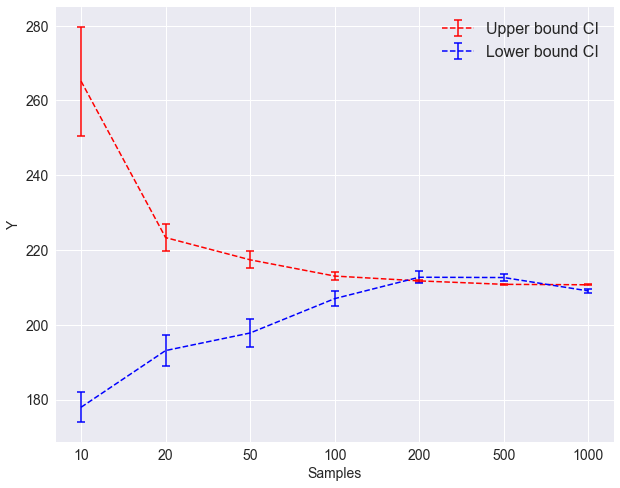

In [25]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], UB_seq, yerr = UB_ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], LB_seq, yerr = LB_ci, color="b", **linestyle)
ax.legend(['Upper bound CI','Lower bound CI'], fontsize  = 16)
plt.show()

From the experiment, we can found out that as the sample increases the confidence interval decreases and both the upper and lower bound are close to the optimal value.  

# 4. Summary

SAA has the advantage that we only need to estimate the probability distributions of the individual parameters. The problem are then approximated by random sampling from the parameter distributions and are assumed to be equally likely. After a large number of sampling we could approximate the underlying stochastic process. 
  
We don't need to solve the whole problem  or consider all scenarios!
- Using sampled approximations, you can quickly get good solutions (and bounds) to difficult stochastic programs
- Owing to the random sampling, SAA cannot deal with the occurrence of rare events that have a very low probability well.


# 5. Reference

- Introduction to Stochastic Programming, Birge, J.R. and Louveaux, F. 2011.  Springer.
- Lectures on Stochastic Programming: Modeling and Theory, Alexander Shapiro, Darinka Dentcheva, Andrzej Ruszczynski, SIAM.
- https://github.com/limohaha/Stochastic-Optimization
- A Guide to Sample-Average Approximation, Sujin Kim, 2011.
- Sampling Methods for Stochastic Programming, Jeff Linderoth, http://homepages.cae.wisc.edu/~linderot/classes/ie495/lecture17.pdf
- Supply Chain Engineering,  Marc Goetschalckx.  Springer.



